In [24]:
import numpy as np
import pandas as pd 
import tensorflow as tf

In [25]:
X_xor = np.random.randn(1000,2)
print(X_xor)
print(X_xor.shape)

[[ 2.28830411  1.97766786]
 [ 1.8976175  -0.0790006 ]
 [-0.67793142  0.5799305 ]
 ...
 [-0.48296179  0.29038502]
 [-0.5089213   0.37264737]
 [ 1.08100934 -0.18147514]]
(1000, 2)


In [26]:
y_xor = np.logical_xor(X_xor[:,0]>0,X_xor[:,1]>0)
"""
	1.	X_xor[:,0] > 0:
	•	Extracts the first column of X_xor and checks if each value is greater than 0.
	•	This creates a Boolean array (True or False).
	2.	X_xor[:,1] > 0:
	•	Extracts the second column and performs the same check.
	3.	np.logical_xor(condition1, condition2):
	•	Performs an XOR (exclusive OR) operation:
	•	True if one condition is True but not both.
	•	False if both are True or both are False.
 """

'\n\t1.\tX_xor[:,0] > 0:\n\t•\tExtracts the first column of X_xor and checks if each value is greater than 0.\n\t•\tThis creates a Boolean array (True or False).\n\t2.\tX_xor[:,1] > 0:\n\t•\tExtracts the second column and performs the same check.\n\t3.\tnp.logical_xor(condition1, condition2):\n\t•\tPerforms an XOR (exclusive OR) operation:\n\t•\tTrue if one condition is True but not both.\n\t•\tFalse if both are True or both are False.\n '

In [27]:
y_xor = np.where(y_xor, 1, -1)
print(y_xor.shape)

(1000,)


In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_xor,y_xor, test_size=0.3,random_state=1)



In [29]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)


In [30]:
from sklearn.svm import SVC

svm_gau = SVC(kernel='rbf', gamma=5, C=1)

svm_gau.fit(X_train,y_train)
y_rbf = svm_gau.predict(X_test)

/Users/aryan/Desktop/AritificIAL INTELLIGENCE AND Pattern Recognition /Class Work/PlotClassification.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


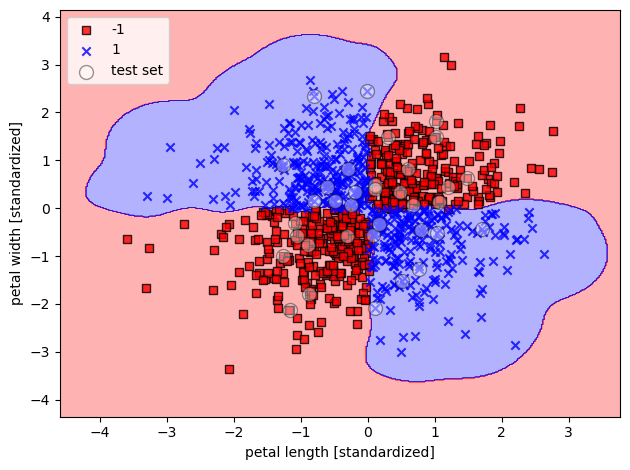

In [31]:
#Test the SVM model 

y_hat = svm_gau.predict(X_test)

from sklearn.metrics import confusion_matrix
confmat = confusion_matrix(y_test, y_hat)

#--- Plot the decision boundary ---

import matplotlib.pyplot as plt
from PlotClassification import plot_decision_regions

import numpy as np
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined, classifier=svm_gau, test_idx=range(115, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()



In [32]:
from sklearn.metrics import confusion_matrix
confmat = confusion_matrix(y_test, y_rbf)
print(confmat)

[[155   9]
 [  3 133]]


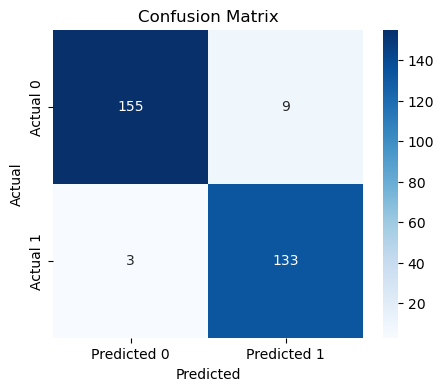

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5,4))
sns.heatmap(confmat, annot=True, fmt='d', cmap="Blues",
            xticklabels=["Predicted 0", "Predicted 1"], 
            yticklabels=["Actual 0", "Actual 1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

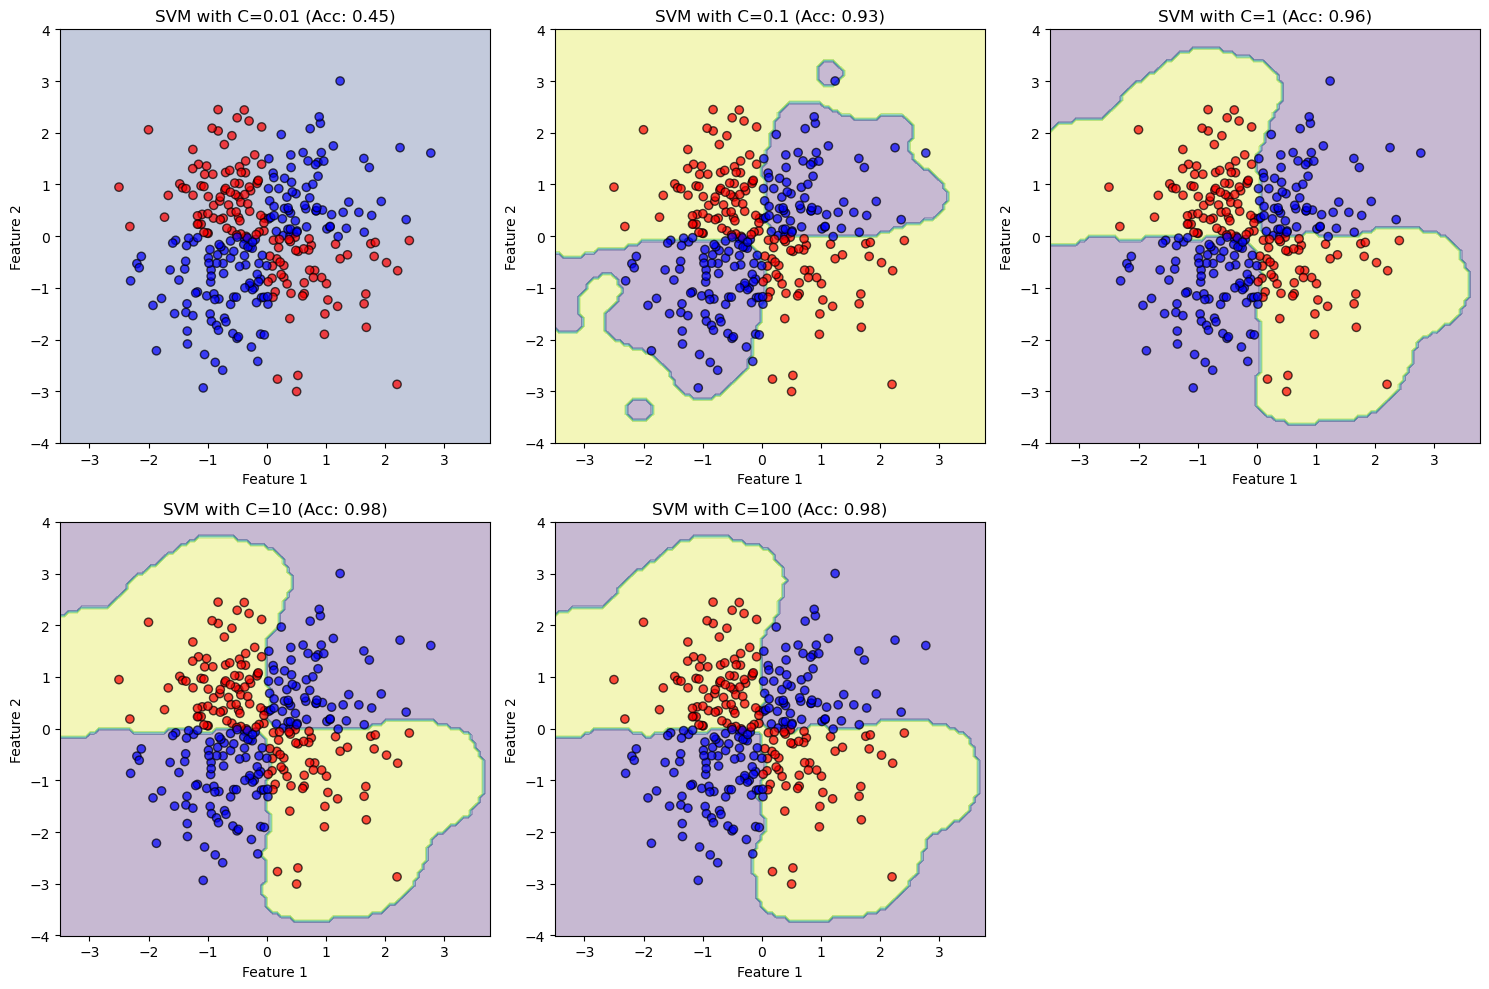

In [34]:
# Function to plot decision boundaries
from sklearn.metrics import accuracy_score
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.bwr, alpha=0.7)
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")

# Train and visualize SVMs for different C values
plt.figure(figsize=(15, 10))

accuracies = []

# Different values of C to test
C_values = [0.01, 0.1, 1, 10, 100]

for i, C in enumerate(C_values,1):
    svm_gau = SVC(kernel='rbf', gamma=5, C=C)
    svm_gau.fit(X_train,y_train)
    y_rbf = svm_gau.predict(X_test)
    acc = accuracy_score(y_test, y_rbf)
    accuracies.append((C, acc))  # to store accuracy results
    plt.subplot(2, 3, i)
    plot_decision_boundary(svm_gau, X_test, y_test, f"SVM with C={C} (Acc: {acc:.2f})")

plt.tight_layout()
plt.show()

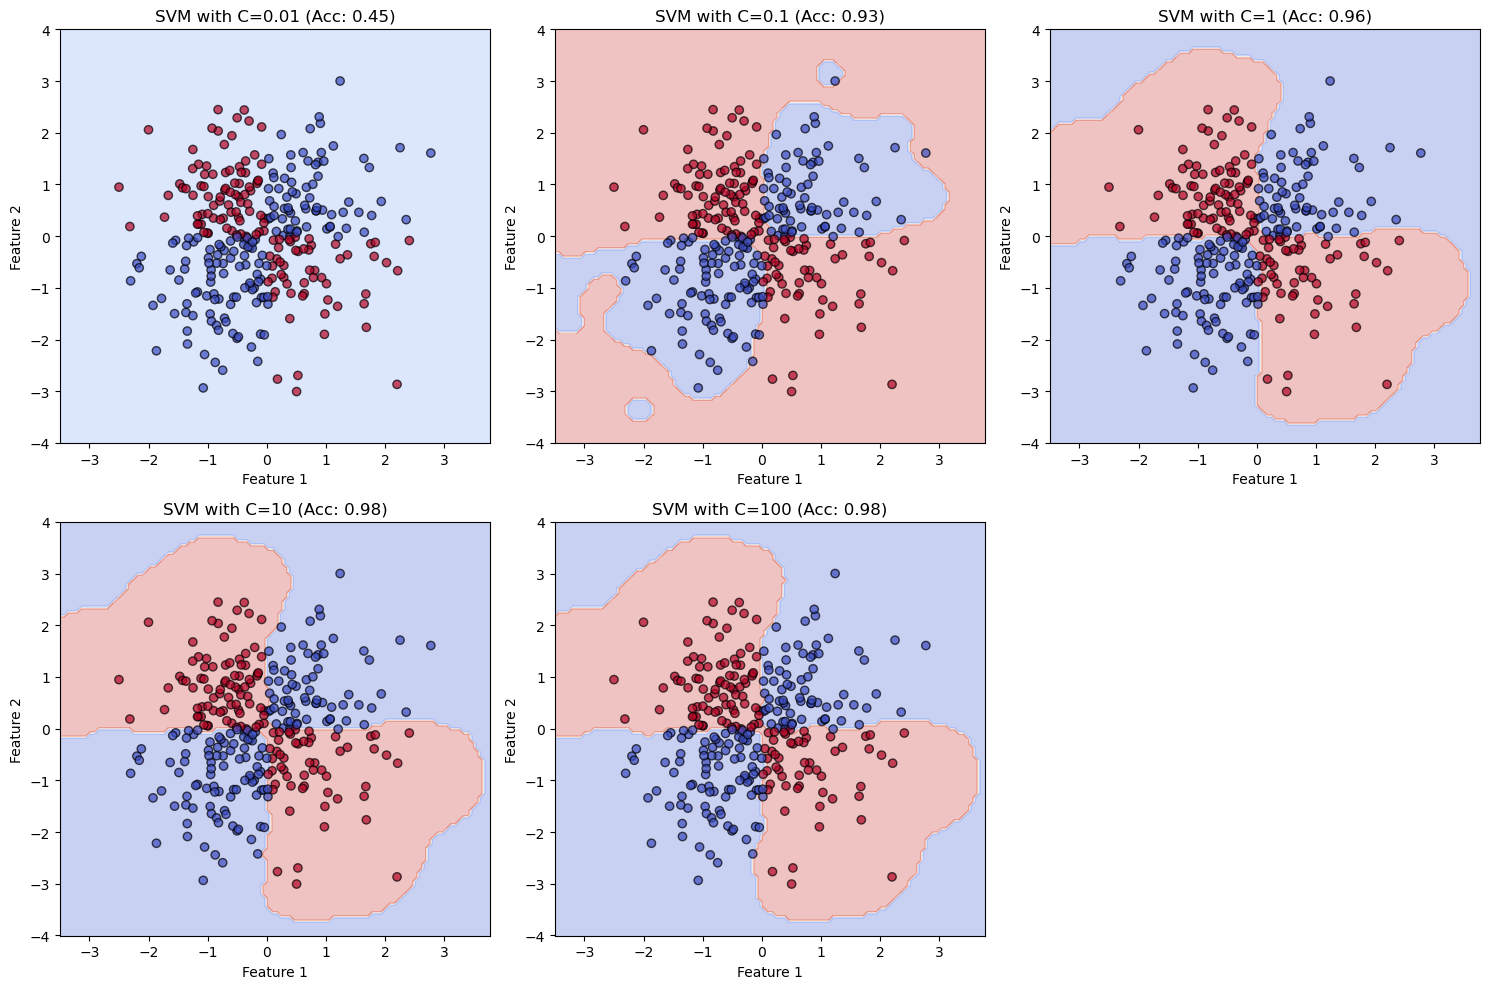

SVM with C=0.01 → Accuracy: 0.4533
SVM with C=0.1 → Accuracy: 0.9333
SVM with C=1 → Accuracy: 0.9600
SVM with C=10 → Accuracy: 0.9767
SVM with C=100 → Accuracy: 0.9800


In [35]:
# Function to plot decision boundaries
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm, alpha=0.7)
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")

# Train and visualize SVMs for different C values
plt.figure(figsize=(15, 10))

accuracies = []
C_values = [0.01, 0.1, 1, 10, 100]

for idx, C in enumerate(C_values, 1): 
    svm_gau = SVC(kernel='rbf', gamma=5, C=C)
    svm_gau.fit(X_train, y_train)
    y_rbf = svm_gau.predict(X_test)
    acc = accuracy_score(y_test, y_rbf)
    accuracies.append((C, acc))  # to store accuracy results

    plt.subplot(2, 3, idx)
    plot_decision_boundary(svm_gau, X_test, y_test, f"SVM with C={C} (Acc: {acc:.2f})")

plt.tight_layout()
plt.show()

# print the accuracy for each C value
for C, acc in accuracies:
    print(f"SVM with C={C} → Accuracy: {acc:.4f}")

**Kernel - Poly**

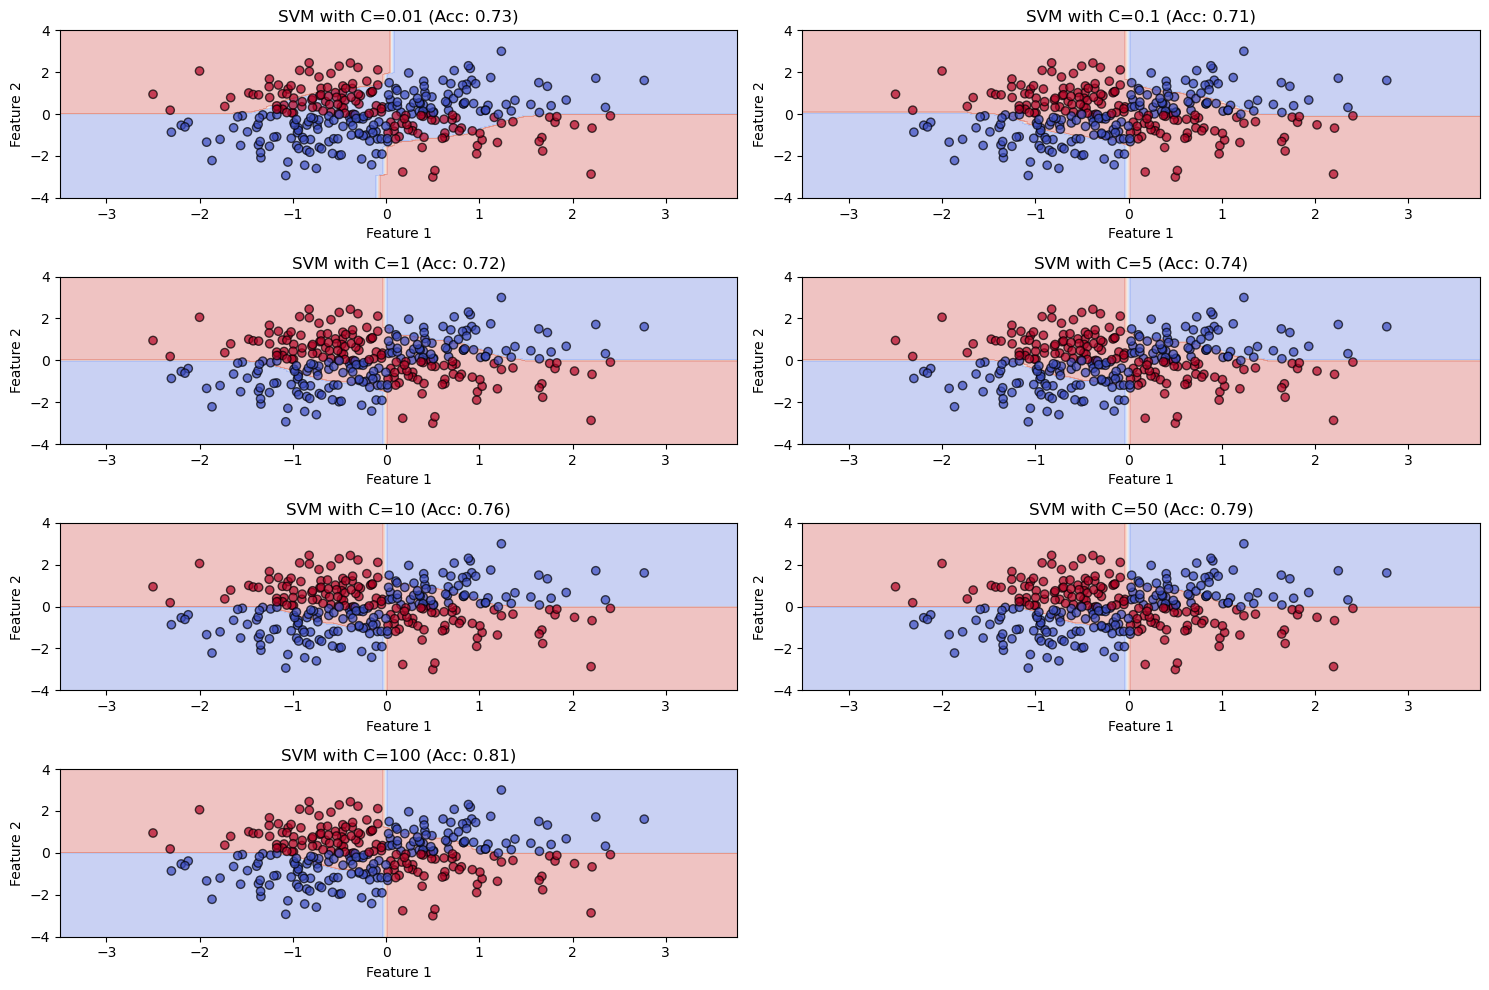

SVM_poly with C=0.01 → Accuracy: 0.7333
SVM_poly with C=0.1 → Accuracy: 0.7100
SVM_poly with C=1 → Accuracy: 0.7233
SVM_poly with C=5 → Accuracy: 0.7400
SVM_poly with C=10 → Accuracy: 0.7633
SVM_poly with C=50 → Accuracy: 0.7900
SVM_poly with C=100 → Accuracy: 0.8100


In [36]:
#With different C value

# Function to plot decision boundaries
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm, alpha=0.7)
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")

# Train and visualize SVMs for different C values
plt.figure(figsize=(15, 10))

accuracies = []
C_values = [0.01, 0.1, 1, 5, 10, 50, 100]

for idx, C in enumerate(C_values, 1): 
    svm_poly = SVC(kernel='poly', degree=10, C=C)
    svm_poly.fit(X_train, y_train)
    y_rbf = svm_poly.predict(X_test)
    acc = accuracy_score(y_test, y_rbf)
    accuracies.append((C, acc))  # to store accuracy results

    plt.subplot(4, 2, idx)
    plot_decision_boundary(svm_poly, X_test, y_test, f"SVM with C={C} (Acc: {acc:.2f})")

plt.tight_layout()
plt.show()

# print the accuracy for each C value
for C, acc in accuracies:
    print(f"SVM_poly with C={C} → Accuracy: {acc:.4f}")

In [ ]:
#With different degree value

# Function to plot decision boundaries
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm, alpha=0.7)
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")

# Train and visualize SVMs for different C values
plt.figure(figsize=(15, 10))

accuracies = []
Degree_v = [1, 5, 10,15]

for idx, d in enumerate(Degree_v, 1): 
    svm_poly = SVC(kernel='poly', degree=d, C=5)
    svm_poly.fit(X_train, y_train)
    y_rbf = svm_poly.predict(X_test)
    acc = accuracy_score(y_test, y_rbf)
    accuracies.append((d, acc))  # to store accuracy results

    plt.subplot(3, 2, idx)
    plot_decision_boundary(svm_poly, X_test, y_test, f"SVM with D={d} (Acc: {acc:.2f})")

plt.tight_layout()
plt.show()

# print the accuracy for each C value
for d, acc in accuracies:
    print(f"SVM_poly with D={d} → Accuracy: {acc:.4f}")

**Decision Tree**
